In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PaisaBazzar/dataset-2.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [6]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


# **Data Wrangling**

In [7]:
df_cleaned = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan'])

# Strip spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Convert 'Credit_History_Age' to numeric
df_cleaned['Credit_History_Age'] = pd.to_numeric(df_cleaned['Credit_History_Age'], errors='coerce')

# **Data Preprocessing**

In [8]:
# Separate numerical and categorical columns
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_cleaned.select_dtypes(include=['object']).columns

In [10]:
# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

In [11]:
df_cleaned[num_cols] = imputer_num.fit_transform(df_cleaned[num_cols])
df_cleaned[cat_cols] = imputer_cat.fit_transform(df_cleaned[cat_cols])

In [12]:
# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Final processed dataframe
df_processed = df_cleaned

In [13]:
df_processed.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1.0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,2.0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,3.0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0


# **EDA**

/tmp/ipython-input-15-1297356562.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_processed, x='Occupation', ax=axes[3], palette='pastel')
/tmp/ipython-input-15-1297356562.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_processed, x='Credit_Score', y='Num_Credit_Card', ax=axes[4], palette='Blues_d')
/tmp/ipython-input-15-1297356562.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_processed, x='Credit_Score', y='Interest_Rate', ax=axes[5], palette='BuPu')
/tmp/ipython-input-15-1297356562.py:34: FutureWar

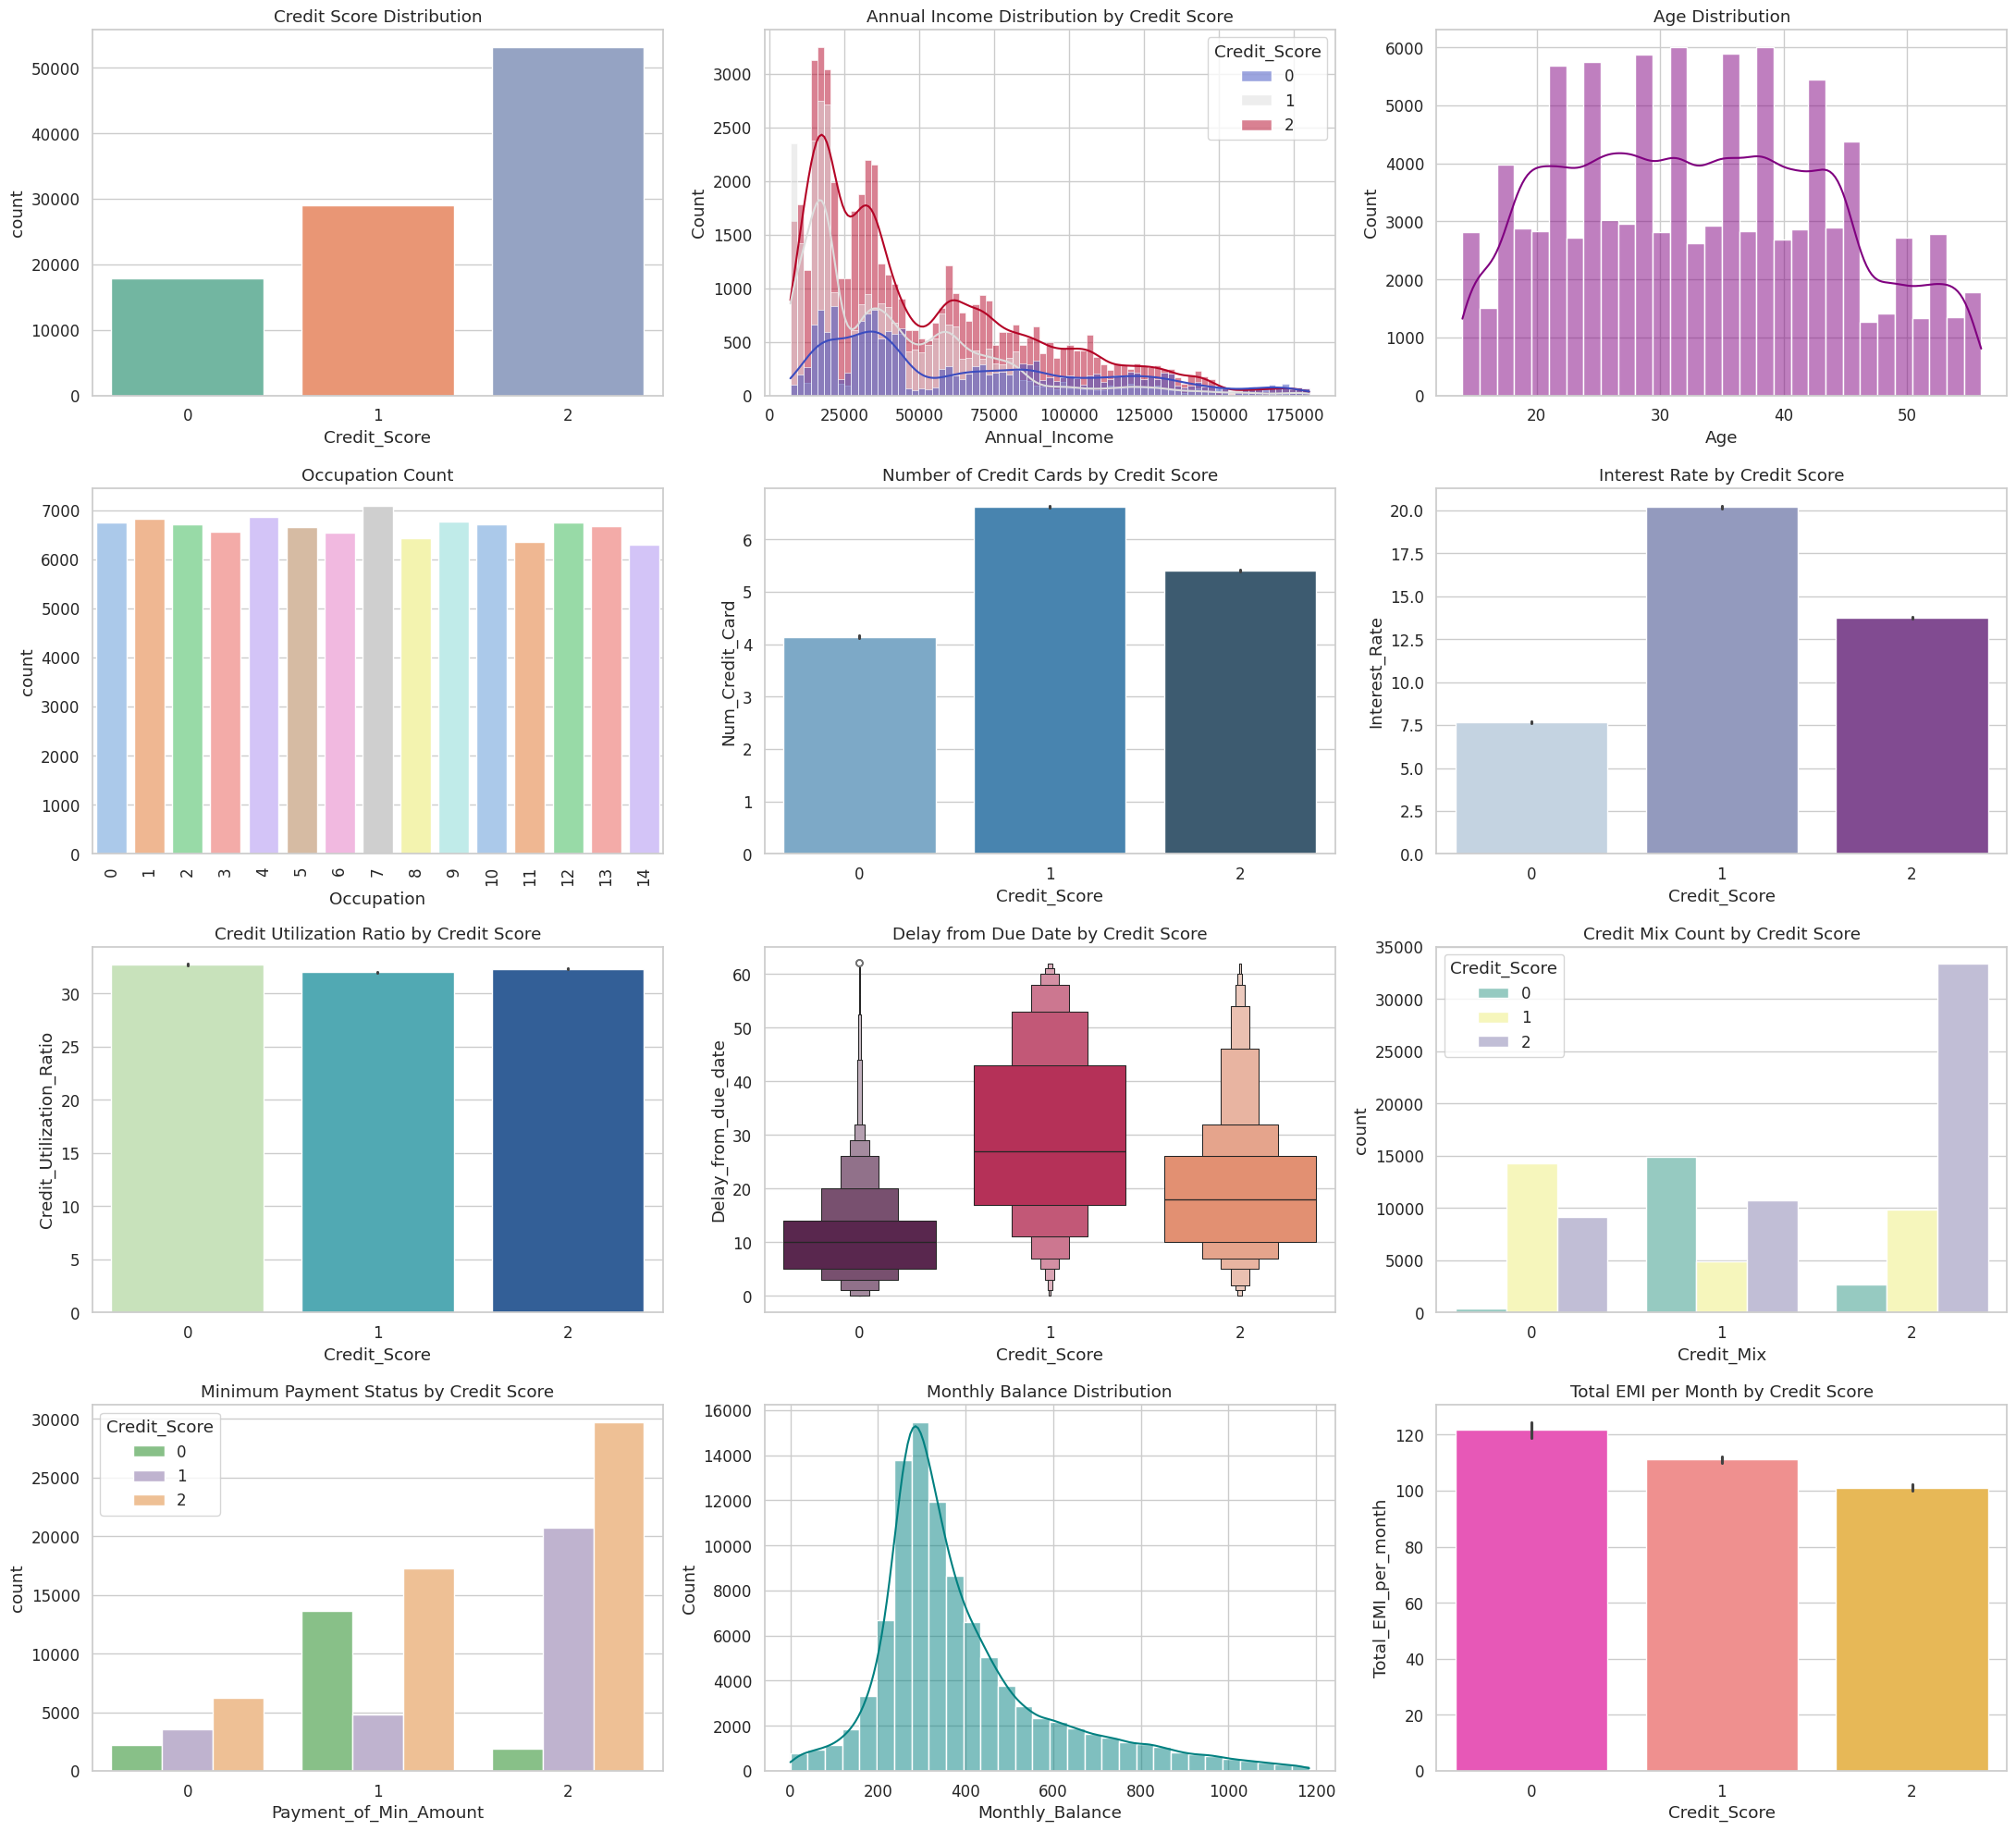

In [15]:
# Set Seaborn theme
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Create a 4x3 grid for 12 plots
fig, axes = plt.subplots(4, 3, figsize=(22, 20))
axes = axes.flatten()

# 1. Countplot of Credit_Score
sns.countplot(data=df_processed, x='Credit_Score', ax=axes[0], palette='Set2')
axes[0].set_title('Credit Score Distribution')

# 2. Distribution of Annual Income
sns.histplot(data=df_processed, x='Annual_Income', hue='Credit_Score', kde=True, ax=axes[1], palette='coolwarm')
axes[1].set_title('Annual Income Distribution by Credit Score')

# 3. Age distribution
sns.histplot(data=df_processed, x='Age', bins=30, kde=True, ax=axes[2], color='purple')
axes[2].set_title('Age Distribution')

# 4. Countplot of Occupation
sns.countplot(data=df_processed, x='Occupation', ax=axes[3], palette='pastel')
axes[3].set_title('Occupation Count')
axes[3].tick_params(axis='x', rotation=90)

# 5. Number of Credit Cards vs Credit Score
sns.barplot(data=df_processed, x='Credit_Score', y='Num_Credit_Card', ax=axes[4], palette='Blues_d')
axes[4].set_title('Number of Credit Cards by Credit Score')

# 6. Interest Rate vs Credit Score
sns.barplot(data=df_processed, x='Credit_Score', y='Interest_Rate', ax=axes[5], palette='BuPu')
axes[5].set_title('Interest Rate by Credit Score')

# 7. Credit Utilization Ratio by Credit Score
sns.barplot(data=df_processed, x='Credit_Score', y='Credit_Utilization_Ratio', ax=axes[6], palette='YlGnBu')
axes[6].set_title('Credit Utilization Ratio by Credit Score')

# 8. Delay from due date by Credit Score
sns.boxenplot(data=df_processed, x='Credit_Score', y='Delay_from_due_date', ax=axes[7], palette='rocket')
axes[7].set_title('Delay from Due Date by Credit Score')

# 9. Countplot of Credit Mix
sns.countplot(data=df_processed, x='Credit_Mix', hue='Credit_Score', ax=axes[8], palette='Set3')
axes[8].set_title('Credit Mix Count by Credit Score')

# 10. Payment of Minimum Amount by Credit Score
sns.countplot(data=df_processed, x='Payment_of_Min_Amount', hue='Credit_Score', ax=axes[9], palette='Accent')
axes[9].set_title('Minimum Payment Status by Credit Score')

# 11. Monthly Balance Distribution
sns.histplot(data=df_processed, x='Monthly_Balance', bins=30, kde=True, ax=axes[10], color='teal')
axes[10].set_title('Monthly Balance Distribution')

# 12. Total EMI per month by Credit Score
sns.barplot(data=df_processed, x='Credit_Score', y='Total_EMI_per_month', ax=axes[11], palette='spring')
axes[11].set_title('Total EMI per Month by Credit Score')

plt.tight_layout()
plt.show()

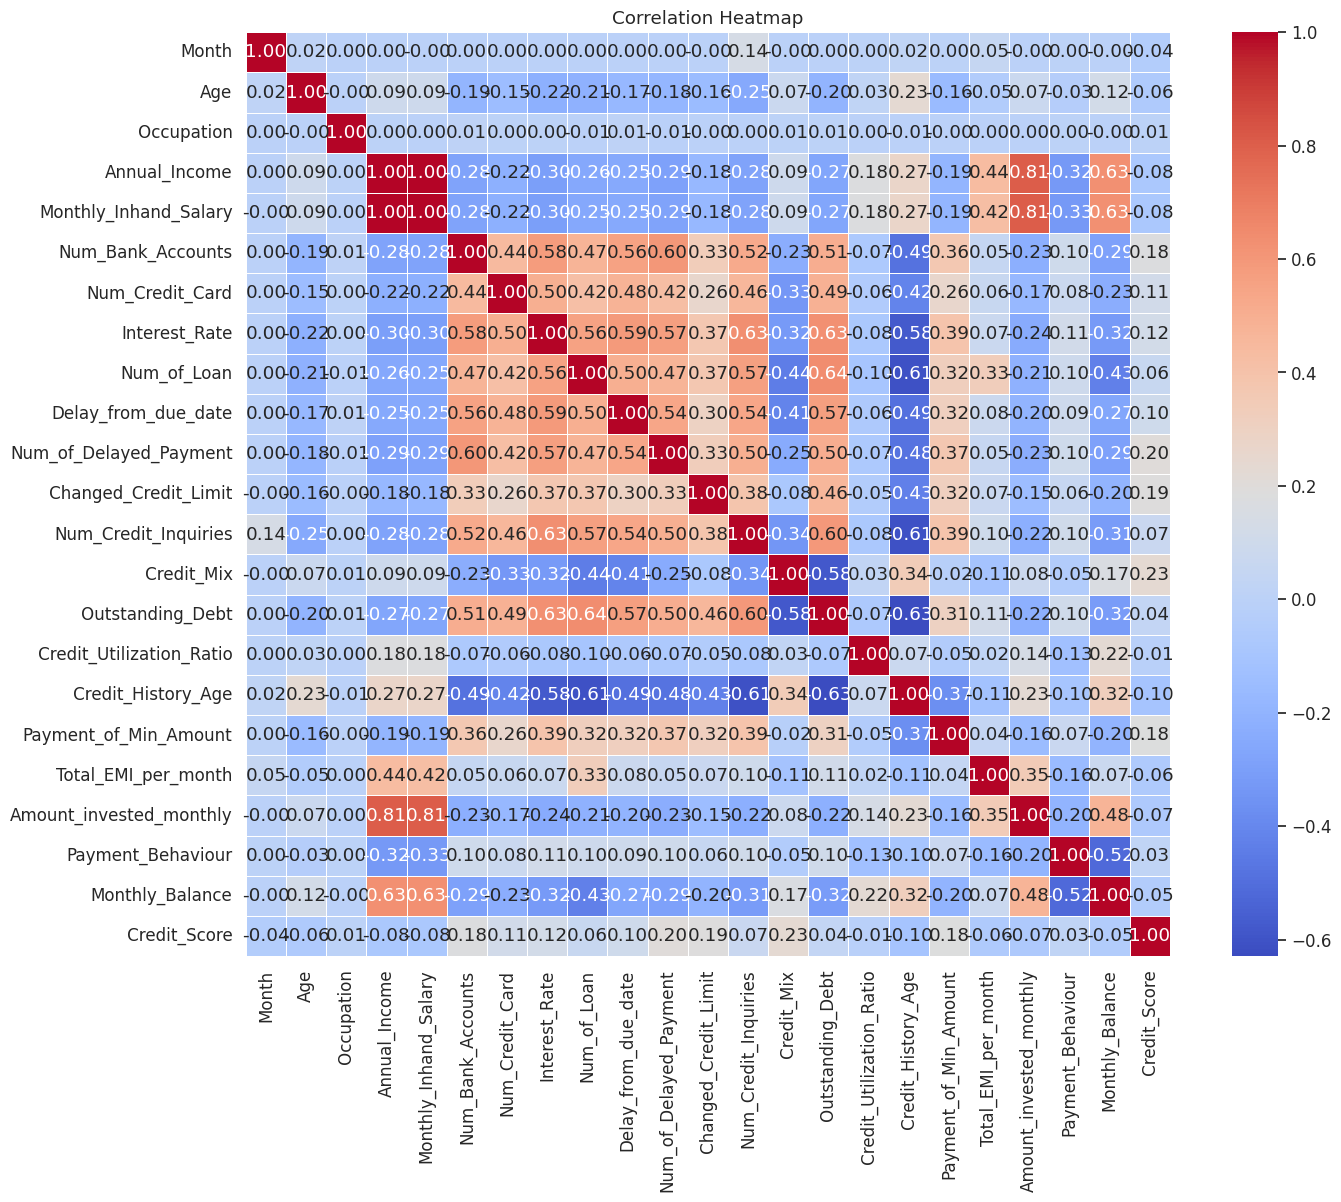

In [16]:
import numpy as np

# Calculate correlation matrix
correlation_matrix = df_processed.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
cor_target = abs(correlation_matrix["Credit_Score"])
relevant_features = cor_target[cor_target > 0.1].sort_values(ascending=False)

relevant_features

,Credit_Score
Credit_Score,1.000000
Credit_Mix,0.229920
Num_of_Delayed_Payment,0.203116
Changed_Credit_Limit,0.190080
Payment_of_Min_Amount,0.179948
Num_Bank_Accounts,0.177389
Interest_Rate,0.121088
Num_Credit_Card,0.113333
Credit_History_Age,0.102598


# **Model Training**

In [20]:
cor_target = abs(correlation_matrix["Credit_Score"])
relevant_features = cor_target[cor_target > 0.1].sort_values(ascending=False)

In [21]:
selected_features = list(relevant_features.index)
selected_features.remove("Credit_Score")  # remove target from feature list

In [22]:
X = df_processed[selected_features]
y = df_processed['Credit_Score']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Logistic Regression ---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.63255
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52      3527
           1       0.65      0.50      0.56      5874
           2       0.65      0.75      0.70     10599

    accuracy                           0.63     20000
   macro avg       0.61      0.58      0.59     20000
weighted avg       0.63      0.63      0.63     20000

Confusion Matrix:
 [[1775   57 1695]
 [ 389 2929 2556]
 [1108 1544 7947]]

--- Random Forest ---
Accuracy: 0.79535
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      3527
           1       0.79      0.79      0.79      5874
           2       0.81      0.81      0.81     10599

    accuracy                           0.80     20000
   macro avg       0.79      0.78      0.79     20000
weighted avg       0.80      0.80      0.80     20000

Confusion Matrix:
 [[2642   24  861]
 [  69 4628 1177]
 [

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.73145
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.66      3527
           1       0.76      0.65      0.70      5874
           2       0.75      0.79      0.77     10599

    accuracy                           0.73     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.73      0.73      0.73     20000

Confusion Matrix:
 [[2434   38 1055]
 [ 381 3825 1668]
 [1090 1139 8370]]


# **Hyper-Parameter Tuning**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a reduced/randomized parameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize base model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                # Try 30 random combinations
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,                # Use all processors
    verbose=2,
    random_state=42
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best model and evaluation
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Output results
print("Best Parameters:", random_search.best_params_)
print(" Best Cross-Validated Accuracy:", random_search.best_score_)

print("\n Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
 Best Cross-Validated Accuracy: 0.7916375

 Final Test Accuracy: 0.80105

 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      3527
           1       0.80      0.80      0.80      5874
           2       0.82      0.82      0.82     10599

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000

